In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
import matplotlib.patches as patches

np.random.seed(1)
train_path = 'D:/Fruit_ObjectDetection/train_zip/train'

# How to use ET 

In [2]:
def make_one_image(path):
    image = cv2.imread(path.replace("xml", "jpg"))
    width = image.shape[1]
    height = image.shape[0]


    for member in root.findall("object"):

        xmin = int(member.find("bndbox").find("xmin").text)
        xmax = int(member.find("bndbox").find("xmax").text)

        ymin = int(member.find("bndbox").find("ymin").text)
        ymax = int(member.find("bndbox").find("ymax").text)

        x_min_corr = (xmin/width)*200
        x_max_corr = (xmax/width)*200

        y_min_corr = (ymin/height)*200        
        y_max_corr= (ymax/height)*200 
    return [x_min_corr, x_max_corr, y_min_corr, y_max_corr]

In [3]:
path = train_path+"/apple_2.xml"
tree = ET.parse(path)
root = tree.getroot()
x_min_corr, x_max_corr, y_min_corr, y_max_corr = make_one_image(path)

image = cv2.imread(train_path+"/apple_2.jpg")
image = cv2.resize(image, (200, 200))
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

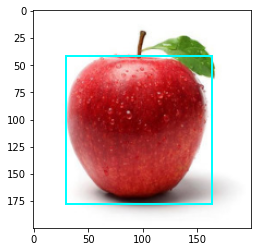

In [4]:
plt.imshow(image)
ax = plt.gca()
rect = patches.Rectangle((x_min_corr,y_min_corr),
                        x_max_corr-x_min_corr, y_max_corr-y_min_corr, linewidth=2, fill=False, edgecolor="cyan")
ax.add_patch(rect)
plt.show()

이미지 및 바운딩 박스는 제대로 파싱 되었다.

# Parse bounding box

In [14]:
xml_path = os.path.join("D:/Fruit_ObjectDetection/train_zip/train/apple_3.xml")
tree = ET.parse(xml_path)
root = tree.getroot()

boxes = []
print("//를 이용하여 특정 엘레먼트 아래의 모든 경로를 한번에 탐색 가능: " + root.find(".//xmin").text)
for box in root.findall('.//bndbox'):
    xmin = int(box.find('xmin').text)
    ymin = int(box.find('ymin').text)
    xmax = int(box.find('xmax').text)
    ymax = int(box.find('ymax').text)
    coors = [xmin, ymin, xmax, ymax]
    boxes.append(coors)
# extract image dimensions
width = int(root.find('.//size/width').text)
height = int(root.find('.//size/height').text)
print(boxes, width, height)
    
#     for box in root.findall('object'):
#         train_labels.append(self.classes.index(member.find('name').text))

#         # bounding box
#         xmin = int(member.find('bndbox').find('xmin').text)
#         xmax = int(member.find('bndbox').find('xmax').text)

#         ymin = int(member.find('bndbox').find('ymin').text)
#         ymax = int(member.find('bndbox').find('ymax').text)


#         xmin_corr = (xmin/wt)*self.width
#         xmax_corr = (xmax/wt)*self.width
#         ymin_corr = (ymin/ht)*self.height
#         ymax_corr = (ymax/ht)*self.height

#         boxes.append([xmin_corr, ymin_corr, xmax_corr, ymax_corr])

//를 이용하여 특정 엘레먼트 아래의 모든 경로를 한번에 탐색 가능: 584
[[584, 438, 867, 708], [492, 141, 740, 394], [176, 199, 490, 466], [367, 17, 619, 240], [642, 35, 907, 269]] 1000 708


# Load Image data and bounding boxes

In [13]:
train_images = []       
train_labels = []
train_boxes=[]
shape = (200,200)  
train_path = 'D:/Fruit_ObjectDetection/train_zip/train'

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        train_images.append(img)
        
        width = image.shape[1]
        height = image.shape[0]
    elif filename.split('.')[1] == 'xml':
        xml_path = os.path.join(train_path,filename)
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        for box in root.findall('object'):
            train_labels.append(self.classes.index(member.find('name').text))
            
            # bounding box
            xmin = int(member.find('bndbox').find('xmin').text)
            xmax = int(member.find('bndbox').find('xmax').text)
            
            ymin = int(member.find('bndbox').find('ymin').text)
            ymax = int(member.find('bndbox').find('ymax').text)
            
            
            xmin_corr = (xmin/wt)*self.width
            xmax_corr = (xmax/wt)*self.width
            ymin_corr = (ymin/ht)*self.height
            ymax_corr = (ymax/ht)*self.height
            
            boxes.append([xmin_corr, ymin_corr, xmax_corr, ymax_corr])
# Converting labels into One Hot encoded sparse matrix
encoder = LabelEncoder()
train_labels = encoder.fit_transform(train_labels)

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
X_train,X_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [18]:
encoder.inverse_transform([y_train[0]])

array(['banana'], dtype='<U6')